## Практическая работа №1
### Принятие решений в матричных играх
Выполнила Шарыпина Даша, гр. 6382

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(7, 7)

## Задание 1

Определить границы выигрыша и наличие седловой точки для матрицы $C_1$.

In [2]:
def game_value_bounds(M):
    lower = np.amax(np.amin(M, axis=1))
    upper = np.amin(np.amax(M, axis=0))
    print("Нижняя граница выигрыша =", lower)
    print("Верхняя граница выигрыша =", upper)
    return lower, upper

def is_saddle_point(lower, upper):
    if alpha == beta:
        print("Есть седловая точка")
    else:
        print("Нет седловой точки")

In [3]:
C1 = np.array([[0.5, 0.3, 0.6, 0.7, 0.8],
               [0.6, 0.2, 0.4, 0.9, 1.0],
               [0.7, 0.4, 0.7, 1.2, 0.9],
               [1.1, 0.6, 0.5, 1.0, 0.6],
               [0.3, 0.5, 0.9, 0.7, 1.0],
               [1.2, 0.4, 0.3, 0.2, 0.6]])

alpha, beta = game_value_bounds(C1)
is_saddle_point(alpha, beta)

Нижняя граница выигрыша = 0.5
Верхняя граница выигрыша = 0.6
Нет седловой точки


----------

## Задание 2

Графически и аналитически решить матричную игру $2 \times 2$ для матрицы $C_2$.

In [4]:
C2 = np.array([[3, 5],
               [8, 2]])

**Аналитическое решение**

In [5]:
alpha, beta = game_value_bounds(C2)
is_saddle_point(alpha, beta)

Нижняя граница выигрыша = 3
Верхняя граница выигрыша = 5
Нет седловой точки


Седловой точки нет, поэтому игра решается в смешанных стратегиях.

In [6]:
def analytical_mixed_strategy_2x2(M):
    denom = M[0,0] + M[1,1] - M[1,0] - M[0,1]
    p1 = (M[1,1] - M[1,0]) / denom
    p2 = (M[0,0] - M[0,1]) / denom

    q1 = (M[1,1] - M[0,1]) / denom
    q2 = (M[0,0] - M[1,0]) / denom

    value = np.linalg.det(M) / denom
    
    return (p1, p2), (q1, q2), value

In [7]:
p, q, value = analytical_mixed_strategy_2x2(C2)
print("Оптимальная стратегия игрока А:", p)
print("Оптимальная стратегия игрока Б:", q)
print("Цена игры:", round(value, 3))

Оптимальная стратегия игрока А: (0.75, 0.25)
Оптимальная стратегия игрока Б: (0.375, 0.625)
Цена игры: 4.25


**Графическое решение**

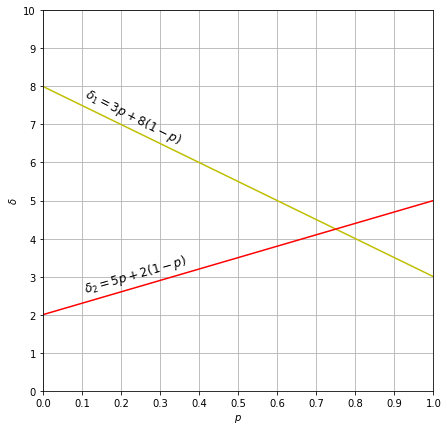

In [8]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([0, 10])


colors = ["y-", "r-", "m-", "c-"]

for i in range(2):
    plt.plot([0, 1], [C2[1, i], C2[0, i]], colors[i])
    
plt.text(0.1, 6.5, r'$\delta_1 = 3p + 8(1-p)$',
        rotation=-27, 
        size=12)
plt.text(0.1, 2.6, r'$\delta_2 = 5p + 2(1-p)$',
        rotation=16, size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 10, 11))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$p$')
plt.grid()

plt.show()

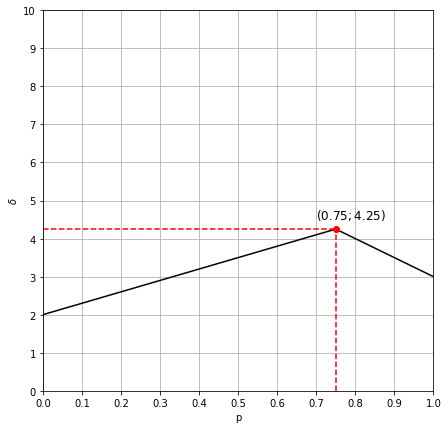

In [9]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([0, 10])

plt.plot([0, 0.75], [2, 4.25], 'k-')
plt.plot([0.75, 1], [4.25, 3], 'k-')
ax.plot(0.75, 4.25, "or", color = 'r')
plt.plot([0.75, 0.75], [0, 4.25], 'r--')
plt.plot([0, 0.75], [4.25, 4.25], 'r--')

plt.text(0.7, 4.5, r'$(0.75; 4.25)$', size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 10, 11))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel('p')
plt.grid()
plt.show()

---
## Задание 3

Графически и аналитически решить матричную игру $2\times N$ для матрицы $C_3$.

In [10]:
C3 = np.array([[3, -5, 1, -2],
               [4, 2, -4, 3]])

**Аналитическое решение**

In [11]:
alpha, beta = game_value_bounds(C3)
is_saddle_point(alpha, beta)

Нижняя граница выигрыша = -4
Верхняя граница выигрыша = 1
Нет седловой точки


Седловой точки нет, поэтому игра решается в смешанных стратегиях.

Для второго игрока стратегии $B_1$ и $B_4$ являются заведомо невыгодными (доминируемыми) относительно стратегии $B_2$, поэтому исключим из из матрицы:

\begin{pmatrix}
-5 & 1 \\
2 & -4
\end{pmatrix}

Полученная матрица имеет размерность $2 \times 2$. Решим полученную игру специальным способом для игр $2 \times 2$

In [12]:
C3_ = np.array([[-5, 1], [2, -4]])
p, q, value = analytical_mixed_strategy_2x2(C3_)
q = (0, round(q[0], 3), round(q[1], 3), 0)
print("Оптимальная стратегия игрока А:", p)
print("Оптимальная стратегия игрока Б:", q)
print("Цена игры:", round(value, 3))

Оптимальная стратегия игрока А: (0.5, 0.5)
Оптимальная стратегия игрока Б: (0, 0.417, 0.583, 0)
Цена игры: -1.5


**Графическое решение**

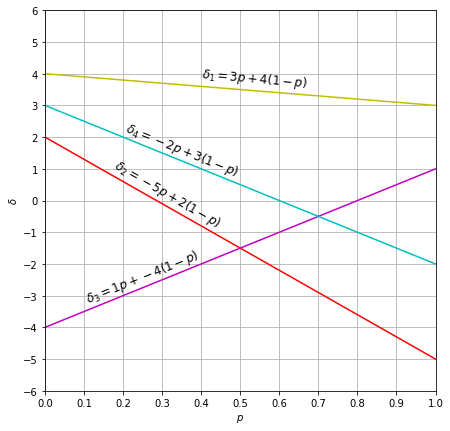

In [13]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-6, 6])


colors = ["y-", "r-", "m-", "c-"]

for i in range(4):
    plt.plot([0, 1], [C3[1, i], C3[0, i]], colors[i])
    
plt.text(0.4, 3.6, r'$\delta_1 = 3p + 4(1-p)$',
        rotation=-5, size=12)
plt.text(0.17, -0.8, r'$\delta_2 = -5p + 2(1-p)$',
        rotation=-30, size=12)
plt.text(0.1, -3.2, r'$\delta_3 = 1p + -4(1-p)$',
        rotation=22, size=12)
plt.text(0.2, 0.8, r'$\delta_4 = -2p + 3(1-p)$',
        rotation=-22, size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(-6, 6, 13))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$p$')
plt.grid()
plt.show()

Выделим огибающую ломанную линию и ее точку максимума:

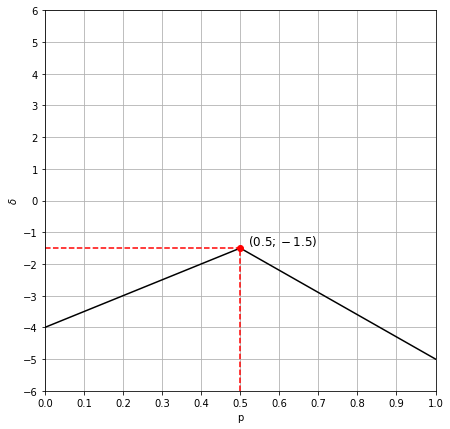

In [15]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-6, 6])

plt.plot([0, 1/2], [-4, -3/2], 'k-')
plt.plot([1/2, 1], [-3/2, -5], 'k-')
ax.plot(1/2, -3/2, "or", color = 'r')
plt.plot([1/2, 1/2], [-6, -3/2], 'r--')
plt.plot([0, 1/2], [-3/2, -3/2], 'r--')

plt.text(0.52, -1.4, r'$(0.5; -1.5)$', size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(-6, 6, 13))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel('p')
plt.grid()
plt.show()

Получаем, что цена игры $\nu = -1.5$, а оптимальная стратегия первого игрока $p=(0.5, 0.5)$

Теперь найдем оптимальную стратегию второго игрока.
Для этого выберем 2 прямые, пересекающиеся в найденной точке:



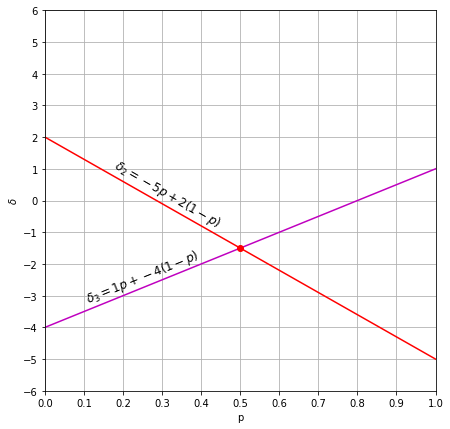

In [16]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([-6, 6])


for i in [1, 2]:
    plt.plot([0, 1], [C3[1, i], C3[0, i]], colors[i])
    
ax.plot(1/2, -3/2, "or", color = 'r')

plt.text(0.17, -0.8, r'$\delta_2 = -5p + 2(1-p)$',
        rotation=-30, size=12)
plt.text(0.1, -3.2, r'$\delta_3 = 1p + -4(1-p)$',
        rotation=22, size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(-6, 6, 13))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel('p')
plt.grid()
plt.show()

Составим усеченную матрицу из столбцов, соответствующих выбранным пересекающимся прямым:

\begin{pmatrix}
-5 & 1\\
2 & -4
\end{pmatrix}

Решим полученную усеченную игру 2x2 и получим ненулевые компоненты оптимальной стратегии игрока 2 аналитически.

In [17]:
C3_ = np.array([[-5, 1], [2, -4]])

p, q, value = analytical_mixed_strategy_2x2(C3_)
q = (0, round(q[0], 3), round(q[1], 3), 0)
print("Оптимальная стратегия игрока А:", p)
print("Оптимальная стратегия игрока Б:", q)
print("Цена игры:", round(value, 3))

Оптимальная стратегия игрока А: (0.5, 0.5)
Оптимальная стратегия игрока Б: (0, 0.417, 0.583, 0)
Цена игры: -1.5


---------------------
## Задание 4
Графически и аналитически решить матричную игру $M \times 2$ для матрицы $C_4$.

In [18]:
C4 = np.array([[3, 5],
               [5, 7],
               [4, 1],
               [2, 4],
               [6, 3]])

**Аналитическое решение**

In [19]:
alpha, beta = game_value_bounds(C4)
is_saddle_point(alpha, beta)

Нижняя граница выигрыша = 5
Верхняя граница выигрыша = 6
Нет седловой точки


Седловой точки нет, поэтому игра решается в смешанных стратегиях.

Для второго игрока стратегии $A_1$, $A_3$ и $A_4$ являются заведомо невыгодными (доминируемыми) относительно стратегии $A_2$, поэтому исключим из из матрицы:

\begin{pmatrix}
5 & 7 \\
6 & 3
\end{pmatrix}

Полученная матрица имеет размерность $2 \times 2$. Решим полученную игру специальным способом для игр $2 \times 2$

In [20]:
C4_ = np.array([[5, 7], [6, 3]])
p, q, value = analytical_mixed_strategy_2x2(C4_)
p = (0, round(p[0], 3), 0, 0, round(p[1], 3))
print("Оптимальная стратегия игрока А:", p)
print("Оптимальная стратегия игрока Б:", q)
print("Цена игры:", round(value, 3))

Оптимальная стратегия игрока А: (0, 0.6, 0, 0, 0.4)
Оптимальная стратегия игрока Б: (0.8, 0.2)
Цена игры: 5.4


**Графическое решение**

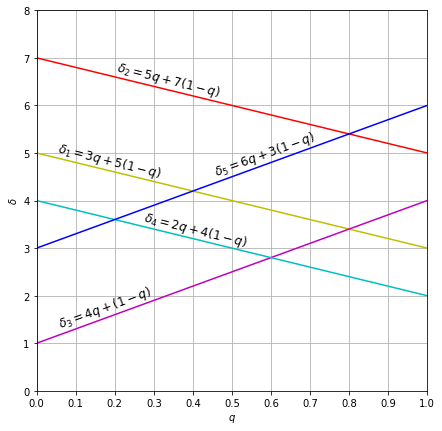

In [23]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([0, 8])


colors = ["y-", "r-", "m-", "c-", "b-"]

for i in range(5):
    plt.plot([0, 1], [C4[i, 1], C4[i, 0]], colors[i])
    
plt.text(0.05, 4.5, r'$\delta_1 = 3q + 5(1-q)$',
        rotation=-14, size=12)
plt.text(0.2, 6.2, r'$\delta_2 = 5q + 7(1-q)$',
        rotation=-14, size=12)
plt.text(0.05, 1.35, r'$\delta_3 = 4q + (1-q)$',
        rotation=20, size=12)
plt.text(0.27, 3.05, r'$\delta_4 = 2q + 4(1-q)$',
         rotation=-14, size=12)
plt.text(0.45, 4.53, r'$\delta_5 = 6q + 3(1-q)$',
        rotation=20, size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 8, 9))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$q$')
plt.grid()
plt.show()

Построим огибающую ломанную сверху и найдем ее минимум.

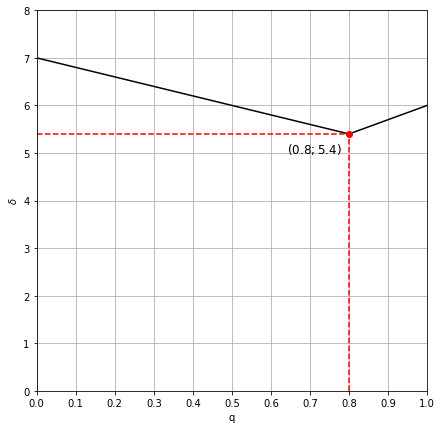

In [25]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([0, 8])

plt.plot([0, 0.8], [7, 5.4], 'k-')
plt.plot([0.8, 1], [5.4, 6], 'k-')
ax.plot(0.8, 5.4, "or", color = 'r')

plt.plot([0.8, 0.8], [0, 5.4], 'r--')
plt.plot([0, 0.8], [5.4, 5.4], 'r--')

plt.text(0.64, 5, r'$(0.8; 5.4)$', size=12)

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 8, 9))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel('q')
plt.grid()
plt.show()

Получаем, что цена игры $\nu = 5.4$, а оптимальная стратегия второго игрока $q=(0.8, 0.2)$

Теперь найдем оптимальную стратегию первого игрока.
Для этого выберем 2 прямые, пересекающиеся в найденной точке:



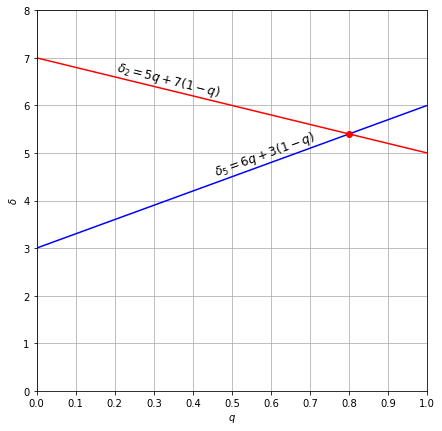

In [26]:
figsize(7, 7)

fig, ax = plt.subplots()
patches = []

ax.set_xlim([0, 1])
ax.set_ylim([0, 8])


colors = ["y-", "r-", "m-", "c-", "b-"]

for i in [1, 4]:
    plt.plot([0, 1], [C4[i, 1], C4[i, 0]], colors[i])
    
plt.text(0.2, 6.2, r'$\delta_2 = 5q + 7(1-q)$',
        rotation=-14, size=12)
plt.text(0.45, 4.53, r'$\delta_5 = 6q + 3(1-q)$',
        rotation=20, size=12)

ax.plot(0.8, 5.4, "or", color = 'r')

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 8, 9))
ax.set_ylabel(r'$\delta$')
ax.set_xlabel(r'$q$')
plt.grid()
plt.show()

Составим усеченную матрицу из столбцов, соответствующих выбранным пересекающимся прямым:

\begin{pmatrix}
5 & 7\\
6 & 3
\end{pmatrix}

Решим полученную усеченную игру 2x2 и получим ненулевые компоненты оптимальной стратегии игрока 1 аналитически.

In [27]:
C4_ = np.array([[5, 7], [6, 3]])

p, q, value = analytical_mixed_strategy_2x2(C4_)
p = (0, p[0], 0, 0, p[1])
print("Оптимальная стратегия игрока А:", p)
print("Оптимальная стратегия игрока Б:", q)
print("Цена игры:", round(value, 3))

Оптимальная стратегия игрока А: (0, 0.6, 0, 0, 0.4)
Оптимальная стратегия игрока Б: (0.8, 0.2)
Цена игры: 5.4


-----------
## Задание 5


С помощью симплекс-метода решить матричную игру $M \times N$ для матрицы $C_5$.

In [28]:
C5 = np.array([[3, 1, 6],
               [2, 4, 3],
               [8, 7, 5]])

$$\min\limits_{x} c^Tx$$

$$A^Tx \leq b$$

In [29]:
from scipy.optimize import linprog

In [34]:
def analytic_solution(M):
    # первый игрок
    A = M.T
    c = np.ones(A.shape[1])
    b = np.ones(A.shape[0])
    # решаем симплекс методом
    x = linprog(c=c, A_ub=-A, b_ub=-b)
    # цена игры
    price = np.reciprocal(x.fun)
    # оптимальная стратегия 1-го игрока
    p = x.x * price
    
    # второй игрок
    A = M
    c = np.ones(A.shape[1])
    b = np.ones(A.shape[0])
    # решаем симплекс методом
    y = linprog(c=-c, A_ub=A, b_ub=b)
    # цена игры
    price = -np.reciprocal(y.fun)
    # оптимальная стратегия 2-го игрока
    q = y.x * price
    
    print('Оптимальная стратегия 1-го игрока: p = {}'.format(tuple(np.around(p, 3))))
    print('Оптимальная стратегия 2-го игрока: q = {}'.format(tuple(np.around(q, 3))))
    print('Цена игры: {}'.format(round(price, 3)))

In [35]:
analytic_solution(C5)

Оптимальная стратегия 1-го игрока: p = (0.286, 0.0, 0.714)
Оптимальная стратегия 2-го игрока: q = (0.0, 0.143, 0.857)
Цена игры: 5.286
